In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import time
from prettytable import PrettyTable
import math
import matplotlib.pyplot as plt

## Q2d)

### Load dataset

In [ ]:
X = np.loadtxt("X.txt")

In [ ]:
X.shape

(267, 23)

In [ ]:
Y = np.loadtxt("Y.txt")

In [ ]:
Y.shape

(267,)

In [ ]:
def logLikli(p,x):
  tmp = (1-p)**x
  Proby0Gx = np.prod(tmp)
  Proby1Gx = (1-Proby0Gx)

  return Proby0Gx,Proby1Gx

In [ ]:
def Estep(p,x,y):
  numi = p*y*x

  deno = (1-p)**x
  deno = np.prod(deno)
  deno = 1-deno
  return numi/deno
  

In [ ]:
pi = np.array([0.05]*X.shape[1])

In [ ]:
print(pi)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]


In [ ]:
TotSamples = []
for i in range(len(X[0])):
  TotSamples.append(np.sum(X[:,i]))
print(TotSamples[:5])

[119.0, 66.0, 105.0, 76.0, 108.0]


In [ ]:
pi = np.array([0.05]*X.shape[1])
N = 256
mistakes = []
loglihood = []
allMistakes = []
allLogli = []
toPrint = [0]
k = 0
for i in range(N):
  mist = 0
  logli = 0
  estep = 0

  for sample in range(X.shape[0]):
    #llhood and mistakes
    Proby0Gx,Proby1Gx = logLikli(pi,X[sample])
    y = Y[sample]
    if y == 1:
      llhood = Proby1Gx
      if Proby1Gx < 0.5:
        mist+=1
    else:
      llhood = Proby0Gx
      if Proby0Gx < 0.5:
        mist+=1
    logli+=np.log(llhood)

    # estep
    estep+=Estep(pi,X[sample],y)
  #   print(Proby0Gx,Proby1Gx,logli,estep)
  #   break
  # break
  
  pi = estep/TotSamples

  allMistakes.append(mist)
  allLogli.append(logli)

  if 2**k == i+1 or i==0:
    if i!=0:
      toPrint.append(2**k)
    mistakes.append(mist)
    loglihood.append(logli/X.shape[0])
    k+=1


In [ ]:
print("Table:")
x = PrettyTable()
x.add_column("Iteration", toPrint)
x.add_column("# Mistakes", mistakes)
x.add_column("LogLikelihood", loglihood)
print(x)

Table:
+-----------+------------+----------------------+
| Iteration | # Mistakes |    LogLikelihood     |
+-----------+------------+----------------------+
|     0     |    175     | -0.9580854082157914  |
|     2     |     56     | -0.49591639407753635 |
|     4     |     40     | -0.3779406836061008  |
|     8     |     44     | -0.3500255657709249  |
|     16    |     40     | -0.33584054521650464 |
|     32    |     37     | -0.3230508504922716  |
|     64    |     37     | -0.3149545210186029  |
|    128    |     36     | -0.3111781626120766  |
|    256    |     36     | -0.31016351482108506 |
+-----------+------------+----------------------+


## Q3c)

In [ ]:
def f(x):
  return math.log(math.cosh(x))

def fd(x):
  return math.tanh(x)

In [ ]:
def Q(x,y):
  return f(y) + (fd(y)*(x-y)) + (0.5*((x-y)**2))

In [ ]:
# x= np.linspace(-1,1,10000)
# print(len(x))
p1 = []
p2 = []
p3 = []
for i in range(-100000,100001):
  i = i/10000
  p1.append(f(i))
  p2.append(Q(i,-2))
  p3.append(Q(i,3))



In [ ]:
x= np.linspace(-10,10,200001)
# x=x/10000

len(x),len(p1)


(200001, 200001)

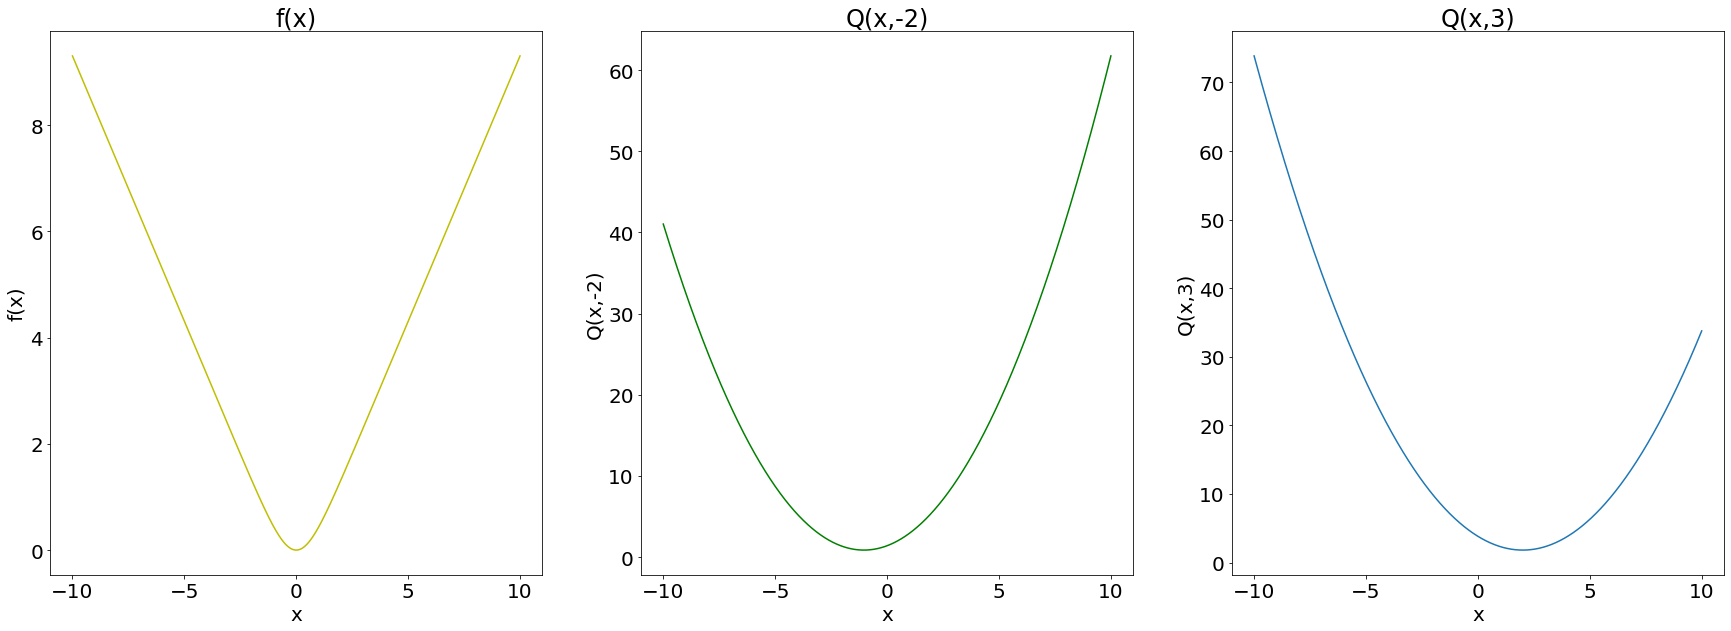

In [ ]:
# x= np.linspace(0/10000,10000/10000,10000)

# x = np.linspace(0,N,N)
fig=plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 20})
fig.add_subplot(1,3,1)
plt.plot(x,p1,"y")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x)')
fig.add_subplot(1,3,2)
plt.plot(x,p2,"g")
plt.xlabel('x')
plt.ylabel('Q(x,-2)')
plt.title('Q(x,-2)')
fig.add_subplot(1,3,3)
plt.plot(x,p3)
plt.xlabel('x')
plt.ylabel('Q(x,3)')
plt.title('Q(x,3)')
plt.show()

## Q3d)

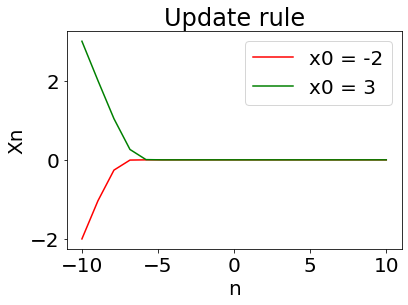

In [ ]:
def updatee(xn):
  return xn-fd(xn)

def doUpdatee(x0,n):
  xn = [x0]
  for i in range(n-1):
    xn.append(updatee(xn[-1]))
  return xn
# x0 = −2 and x0 = 3
x = np.linspace(-10,10,20)
X0_1 = doUpdatee(-2,len(x))
X0_2 = doUpdatee(3,len(x))

plt.plot(x, X0_1, "r",label="x0 = -2")
plt.plot(x, X0_2, "g",label="x0 = 3")
plt.title('Update rule')
plt.ylabel('Xn')
plt.xlabel('n')
plt.legend()
plt.show()
